<a href="https://colab.research.google.com/github/qedir314/BTK-Akademi/blob/main/2_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [11]:
tree_clf = DecisionTreeClassifier(criterion= "gini", max_depth = 5, random_state = 42)  # or criterion="entropy"
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
y_pred = tree_clf.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

In [15]:
confusion_matrix(y_pred, y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

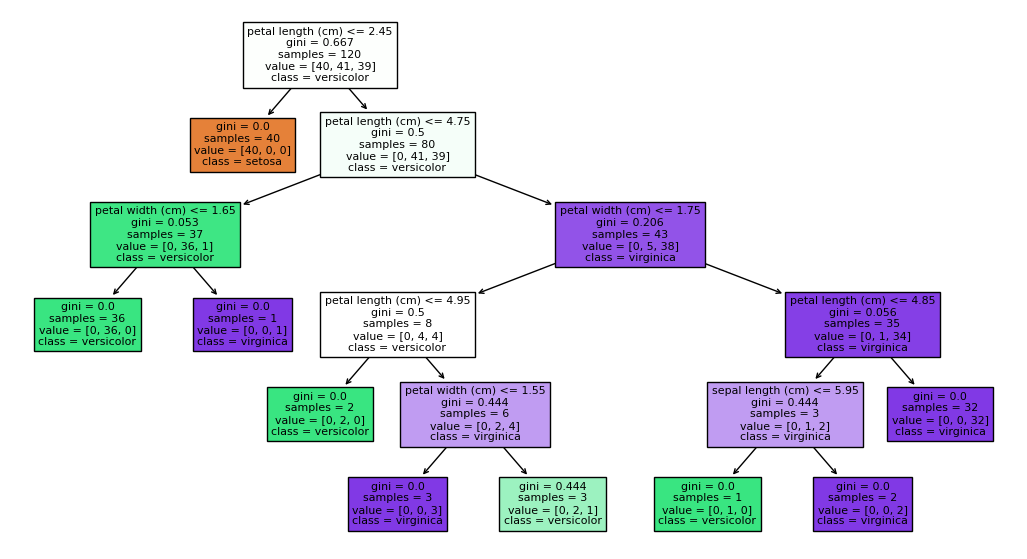

In [28]:
plt.figure(figsize=(13,7))
plot_tree(tree_clf,filled=True, feature_names = iris.feature_names, class_names = iris.target_names)
plt.show()

In [49]:
feature_importance = tree_clf.feature_importances_
feature_names = iris.feature_names
feature_importance_sorted =  sorted(zip(feature_names, feature_importance))
feature_importance_sorted

[('petal length (cm)', 0.9045522597319637),
 ('petal width (cm)', 0.07849499604256478),
 ('sepal length (cm)', 0.016952744225471498),
 ('sepal width (cm)', 0.0)]

## Feature Selection

In [66]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [62]:
iris = load_iris()
n_classes = len(iris.target_names)
plot_colors = 'ryb'

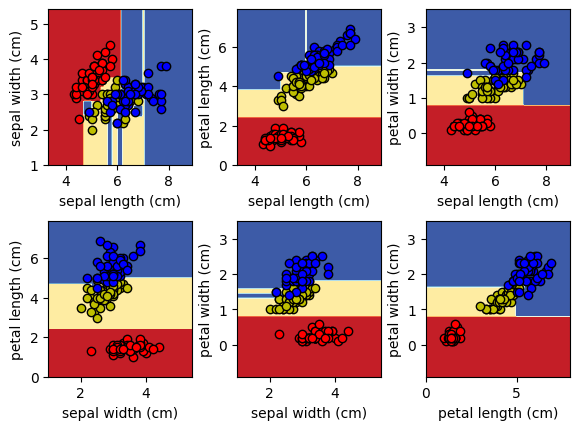

In [70]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
  X = iris.data[:, pair]
  y = iris.target

  clf = DecisionTreeClassifier().fit(X, y)
  ax = plt.subplot(2, 3, pairidx + 1)
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
  DecisionBoundaryDisplay.from_estimator(clf,
                                         X,
                                         cmap=plt.cm.RdYlBu,
                                         ax = ax,
                                         response_method="predict",
                                         xlabel = iris.feature_names[pair[0]],
                                         ylabel = iris.feature_names[pair[1]])
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap="RdYlBu", label=iris.target_names[i], edgecolors="black")
#plt.legend()


## Regression

In [81]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [74]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 ,random_state = 42)

In [82]:
tree_reg = DecisionTreeRegressor(random_state=42)
y_pred = tree_reg.fit(X_train, y_train).predict(X_test)
mean_squared_error(y_pred, y_test), np.sqrt(mean_squared_error(y_pred, y_test))

(4976.797752808989, 70.54642267903446)

## New Regression

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [105]:
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 0.5 * (0.4  - np.random.rand(16))

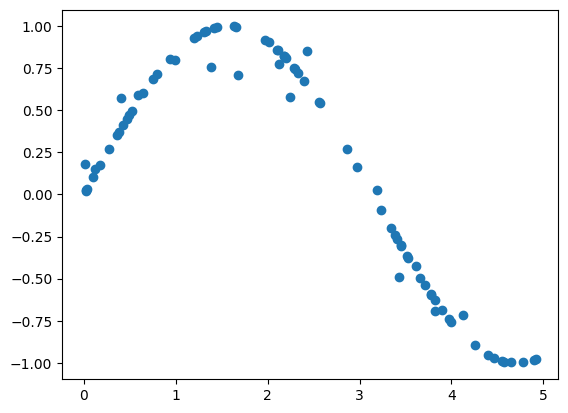

In [106]:
plt.scatter(X, y)
plt.show()

In [107]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)
regr_2 = DecisionTreeRegressor(max_depth=15)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=15)

In [108]:
X_test = np.arange(0, 5, 0.05)[:, np.newaxis]
y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)

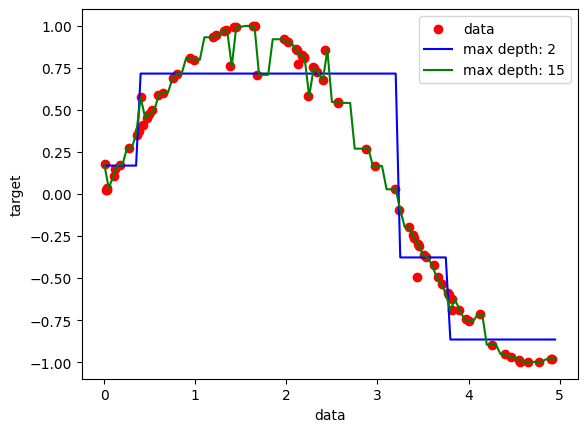

In [109]:
plt.figure()
#plt.plot(X, y, label="data")
plt.scatter(X, y, color="red",label="data")
plt.plot(X_test, y_pred_1, color="blue", label="max depth: 2")
plt.plot(X_test, y_pred_2, color="green", label="max depth: 15")
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()